In [1]:
BUILD_DIR="../build/Release/"
!echo $BUILD_DIR

../build/Release/


In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

# This sys call is needed because the file is in another directory 
import sys
sys.path.insert(1, '../scripts/python/landmark_tools')
import visualize_corr
import landmark

plt.rcParams['figure.figsize'] = [10, 3]

In [3]:
input_landmark="../tests/gold_standard_data/polarstereo_moon.lmk"

In [4]:
!$BUILD_DIR/render_landmark -l $input_landmark -o output/rendered_input -e 30 -a 120 -shadow_acne_normal_bias 20 -shadow_acne_depth_bias 10 
input_landmark="output/rendered_input.lmk"

zsh:1: no such file or directory: ../build/Release//render_landmark


Text(0.5, 1.0, 'Surface Reflectance Map')

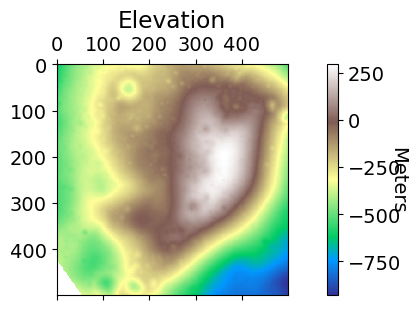

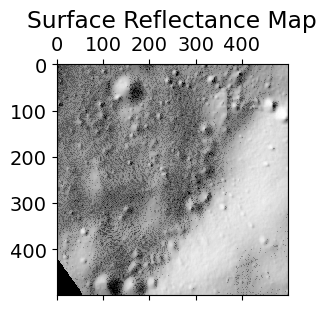

In [5]:
L = landmark.Landmark(input_landmark)

fig, ax = plt.subplots()
cax = ax.matshow(L.ele, cmap='terrain')
ax.set_title("Elevation")
cbar = fig.colorbar(cax)
cbar.ax.set_ylabel('Meters', rotation=270)

fig, ax = plt.subplots()
cax = ax.matshow(L.srm, cmap='gray')
ax.set_title("Surface Reflectance Map")

## Self-compare

Landmark compared to itself should have near zero deltas

In [6]:
!$BUILD_DIR/landmark_comparison \
  -l2 $input_landmark \
  -l1 $input_landmark \
  -o output/self_test1_compare

No parameter file provided. Using defaults.
feature_match: 
  correlation_window_size: 25
  search_window_size: 36
  min_correlation: 0.300000
forstner_feature_detector: 
  min_dist_feature: 5.000000
  num_features: 600
  forstner_feature_window_size: 9
#! LVS Map v3.0
#! LVS Map v3.0
line = 0
num_matched_features 2209
i = 0 j = 0
best feat for homography 2209
num_matched_features 2397
i = 0 j = 200
best feat for homography 2397
num_matched_features 1034
i = 0 j = 400
best feat for homography 1034
line = 200
num_matched_features 2397
i = 200 j = 0
best feat for homography 2397
num_matched_features 2601
i = 200 j = 200
best feat for homography 2601
num_matched_features 1122
i = 200 j = 400
best feat for homography 1122
line = 400
num_matched_features 923
i = 400 j = 0
best feat for homography 923
num_matched_features 1122
i = 400 j = 200
best feat for homography 1122
num_matched_features 484
i = 400 j = 400
best feat for homography 484
Saving results to output/self_test1_compare


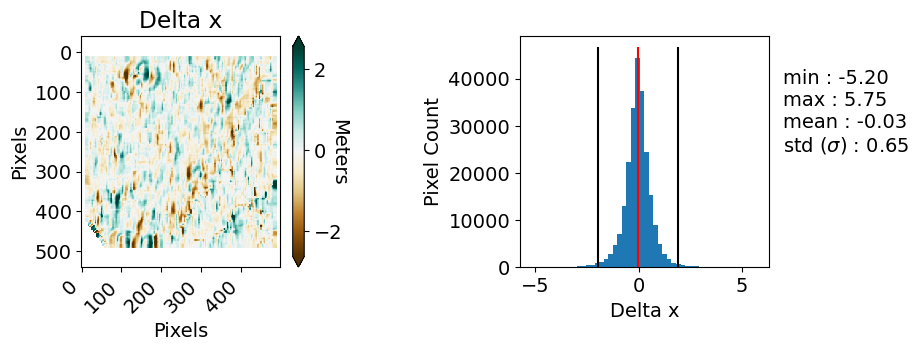

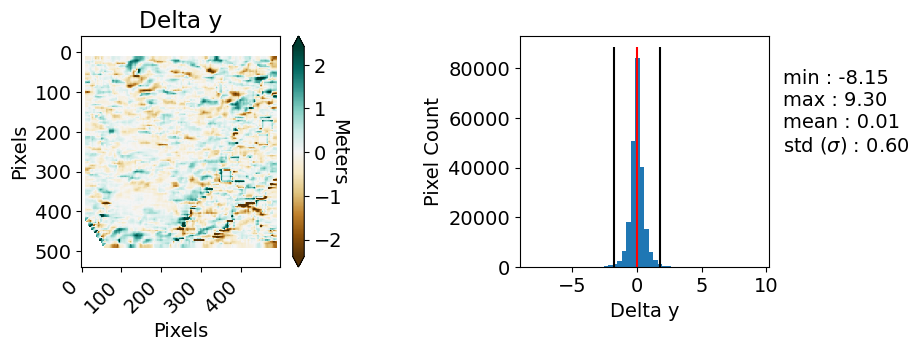

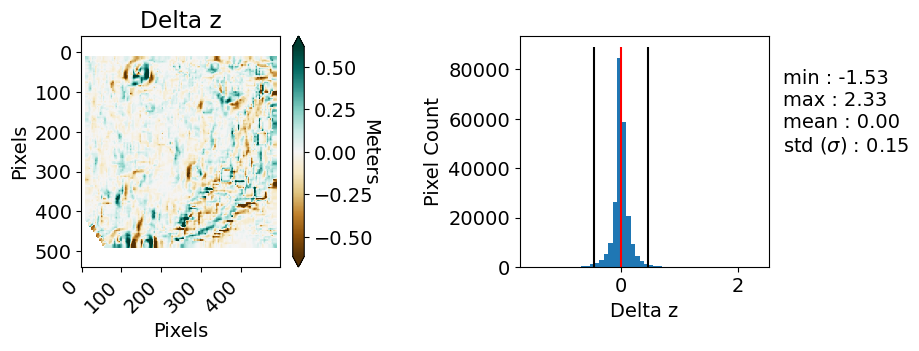

In [7]:
visualize_corr.displayAll("output/self_test1_compare", 500, 500, "self_test1_compare")

## Random Displacement in Z

In [8]:
!$BUILD_DIR/distort_landmark -input $input_landmark \
  -output output/random_test1.lmk \
  -random_displace 0 0.3

!$BUILD_DIR/render_landmark -l output/random_test1.lmk -o output/random_test1 -e 30 -a 120 -shadow_acne_normal_bias 20 -shadow_acne_depth_bias 10 

!$BUILD_DIR/landmark_comparison \
  -l2 output/random_test1.lmk \
  -l1 $input_landmark \
  -o output/random_test1_compare

#! LVS Map v3.0
Applying random displacement to landmark with mu=0.000000, sigma=0.300000 ...done.
Landmark file written to: output/random_test1.lmk
zsh:1: no such file or directory: ../build/Release//render_landmark
No parameter file provided. Using defaults.
feature_match: 
  correlation_window_size: 25
  search_window_size: 36
  min_correlation: 0.300000
forstner_feature_detector: 
  min_dist_feature: 5.000000
  num_features: 600
  forstner_feature_window_size: 9
#! LVS Map v3.0
#! LVS Map v3.0
line = 0
num_matched_features 2209
i = 0 j = 0
best feat for homography 2209
num_matched_features 2397
i = 0 j = 200
best feat for homography 2397
num_matched_features 1034
i = 0 j = 400
best feat for homography 1034
line = 200
num_matched_features 2397
i = 200 j = 0
best feat for homography 2397
num_matched_features 2601
i = 200 j = 200
best feat for homography 2601
num_matched_features 1122
i = 200 j = 400
best feat for homography 1122
line = 400
num_matched_features 923
i = 400 j = 0
best 

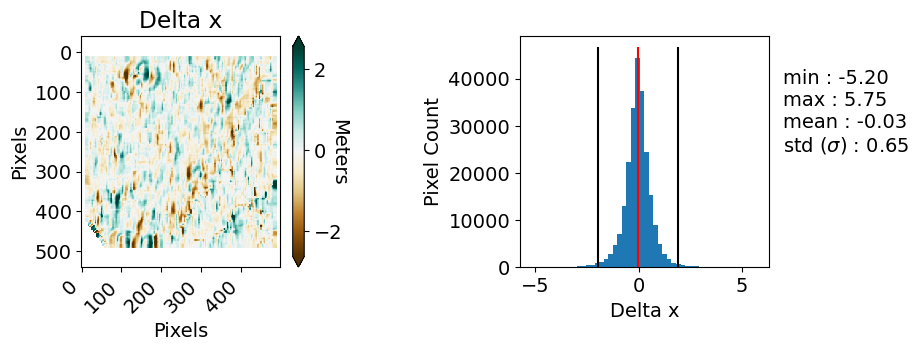

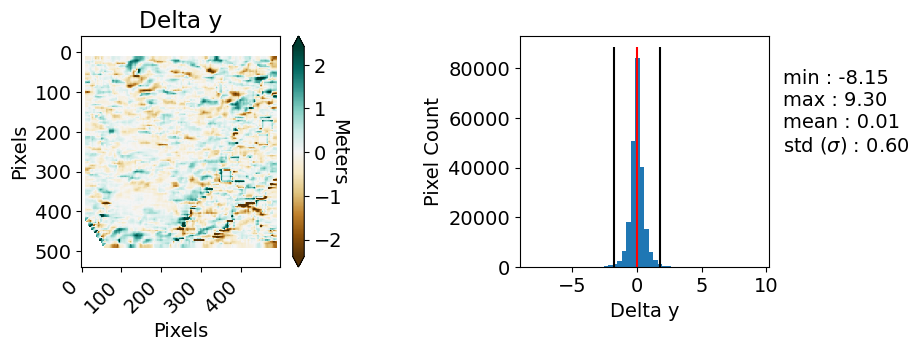

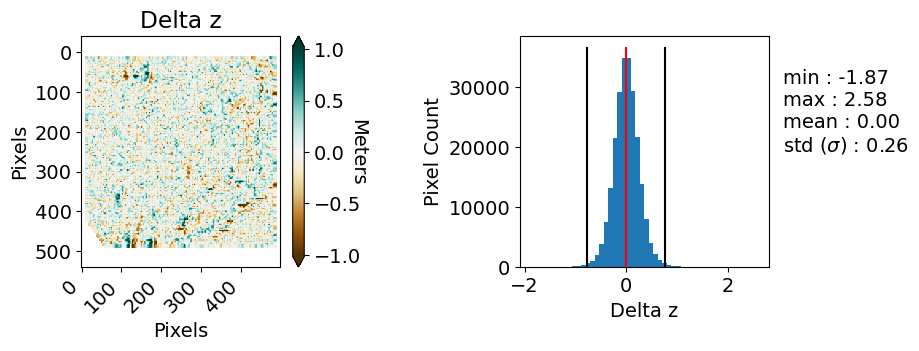

In [9]:
for c in ['x', 'y', 'z']:
    fig = plt.figure()
    filepath = "output/random_test1_compare_delta_{}_500by500.raw".format(c)
    width = 500
    height = 500
    
    I = visualize_corr.readBinaryImage(filepath, width, height)
    mask = np.isnan(I)

    ax = plt.subplot(1,9,(1,3))
    visualize_corr.visualize_corr(I, "random_test1_compare_{}".format(c), "Delta {}".format(c), mask, fig=fig, ax=ax)

    ax1= plt.subplot(1,9,(6,8))
    ax2= plt.subplot(1,9,9)
    visualize_corr.corr_histogram(I, "random_test1_compare_{}".format(c), "Delta {}".format(c), mask, fig=fig, ax1=ax1, ax2=ax2)

## Rotation (Map Orientation Error)

In [10]:
!$BUILD_DIR/distort_landmark -input $input_landmark \
  -output output/rotate_test1.lmk \
  -rotate 1

!$BUILD_DIR/render_landmark -l output/rotate_test1.lmk -o output/rotate_test1 -e 30 -a 120 -shadow_acne_normal_bias 20 -shadow_acne_depth_bias 10 

!$BUILD_DIR/landmark_comparison \
  -l2 output/rotate_test1.lmk \
  -l1 $input_landmark \
  -o output/rotate_test1_compare

#! LVS Map v3.0
Rotating landmark in plane by 1.000000 degrees...done.
Landmark file written to: output/rotate_test1.lmk
zsh:1: no such file or directory: ../build/Release//render_landmark
No parameter file provided. Using defaults.
feature_match: 
  correlation_window_size: 25
  search_window_size: 36
  min_correlation: 0.300000
forstner_feature_detector: 
  min_dist_feature: 5.000000
  num_features: 600
  forstner_feature_window_size: 9
#! LVS Map v3.0
#! LVS Map v3.0
line = 0
num_matched_features 2141
i = 0 j = 0
best feat for homography 2141
num_matched_features 2395
i = 0 j = 200
best feat for homography 2395
num_matched_features 1033
i = 0 j = 400
best feat for homography 1033
line = 200
num_matched_features 2278
i = 200 j = 0
getHomographyFromPoints_RANSAC_frame() ==>> getHomographyFromPointsNormalize() failed, /Users/cmauceri/Workspace/LanderVisionSystem/landmark_tools/src/landmark_tools/math/homography_util.c, 1081
num_matched_features 2599
i = 200 j = 200
best feat for homogr

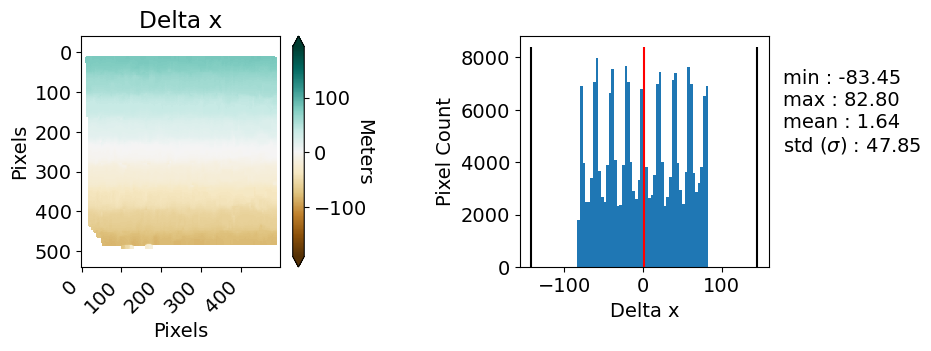

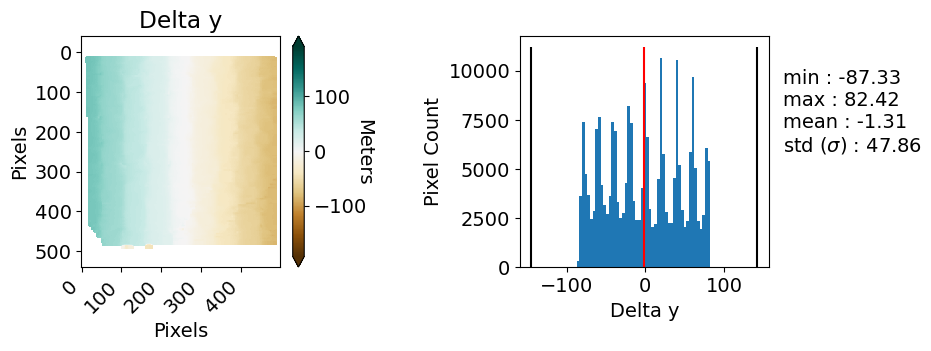

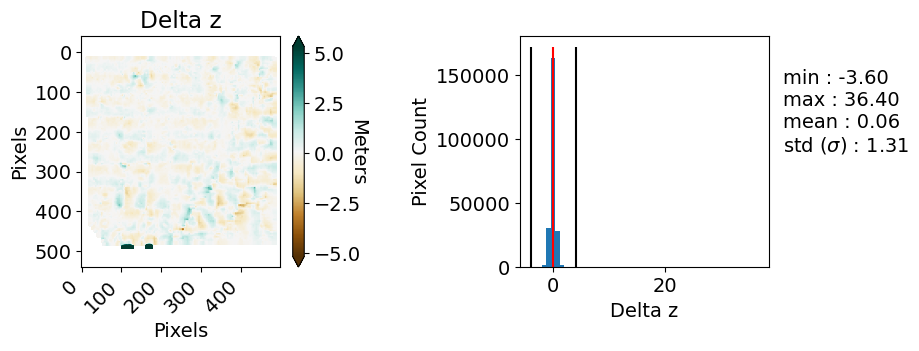

In [11]:
for c in ['x', 'y', 'z']:
    fig = plt.figure()
    filepath = "output/rotate_test1_compare_delta_{}_500by500.raw".format(c)
    width = 500
    height = 500
    
    I = visualize_corr.readBinaryImage(filepath, width, height)
    mask = np.isnan(I)

    ax = plt.subplot(1,9,(1,3))
    visualize_corr.visualize_corr(I, "rotate_test1_compare_{}".format(c), "Delta {}".format(c), mask, fig=fig, ax=ax)

    ax1= plt.subplot(1,9,(6,8))
    ax2= plt.subplot(1,9,9)
    visualize_corr.corr_histogram(I, "rotate_test1_compare_{}".format(c), "Delta {}".format(c), mask, fig=fig, ax1=ax1, ax2=ax2)

## Translation (Map Tie Error)

In [12]:
!$BUILD_DIR/distort_landmark -input $input_landmark \
  -output output/translate_test1.lmk \
  -translate 10 0 10

!$BUILD_DIR/render_landmark -l output/translate_test1.lmk -o output/translate_test1 -e 30 -a 120 -shadow_acne_normal_bias 20 -shadow_acne_depth_bias 10 

!$BUILD_DIR/landmark_comparison \
  -l2 output/translate_test1.lmk \
  -l1 $input_landmark \
  -o output/translate_test1_compare

#! LVS Map v3.0
Translating landmark by (10.000000, 0.000000, 10.000000)...done.
Landmark file written to: output/translate_test1.lmk
zsh:1: no such file or directory: ../build/Release//render_landmark
No parameter file provided. Using defaults.
feature_match: 
  correlation_window_size: 25
  search_window_size: 36
  min_correlation: 0.300000
forstner_feature_detector: 
  min_dist_feature: 5.000000
  num_features: 600
  forstner_feature_window_size: 9
#! LVS Map v3.0
#! LVS Map v3.0
line = 0
num_matched_features 2209
i = 0 j = 0
best feat for homography 2209
num_matched_features 2397
i = 0 j = 200
best feat for homography 2397
num_matched_features 1033
i = 0 j = 400
best feat for homography 1033
line = 200
num_matched_features 2396
i = 200 j = 0
best feat for homography 2396
num_matched_features 2598
i = 200 j = 200
best feat for homography 2598
num_matched_features 1122
i = 200 j = 400
best feat for homography 1122
line = 400
num_matched_features 923
i = 400 j = 0
best feat for homogr

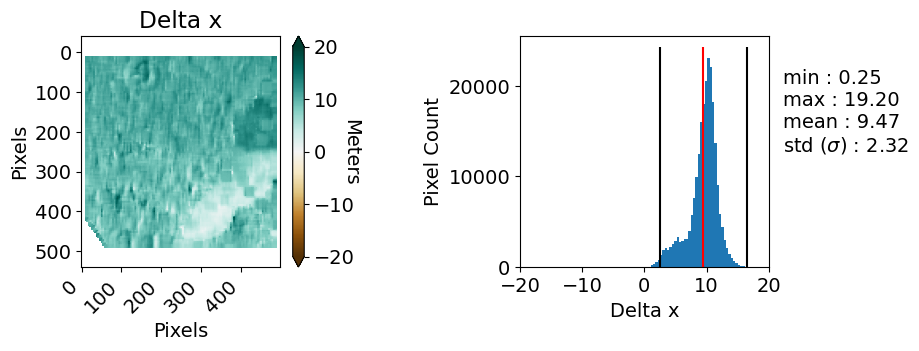

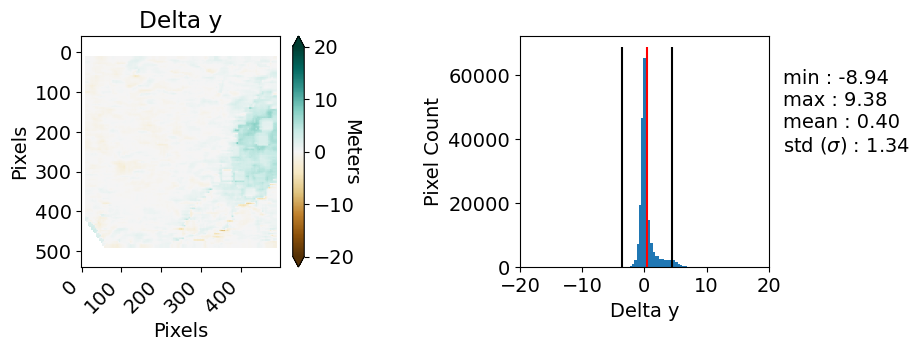

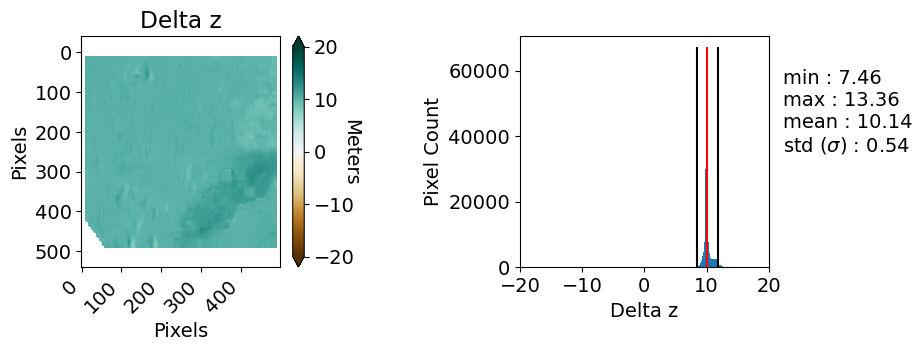

In [13]:
for c in ['x', 'y', 'z']:
    fig = plt.figure()
    filepath = "output/translate_test1_compare_delta_{}_500by500.raw".format(c)
    width = 500
    height = 500
    
    I = visualize_corr.readBinaryImage(filepath, width, height)
    mask = np.isnan(I)

    ax = plt.subplot(1,9,(1,3))
    visualize_corr.visualize_corr(I, "translate_test1_compare_{}".format(c), "Delta {}".format(c), mask, fig=fig, ax=ax, limits=[-20,20])

    ax1= plt.subplot(1,9,(6,8))
    ax2= plt.subplot(1,9,9)
    visualize_corr.corr_histogram(I, "translate_test1_compare_{}".format(c), "Delta {}".format(c), mask, fig=fig, ax1=ax1, ax2=ax2, limits=[-20,20])

In [14]:
!$BUILD_DIR/distort_landmark

Simulate map error
Usage for distort_landmark:
------------------
  Required arguments:
    -input   <filename> - input landmark filepath
    -output  <filename> - output landmark filepath
  Optional arguments:
    -translate <x meters> <y meters> <z meters> - simulates map tie error 
    -rotate <in-plane rotation degrees> - simulates map orientation error
    -random_displace <mean> <stddev> - simulates correlation noise with gaussian elevation displacement


In [15]:
# Image jitter

X = np.zeros((500, 500))

for row in range(0, 50):
    for col in range(0, 500):
        theta = np.sin(2*np.pi*row/50)
        X[row+250, col] = 5*theta

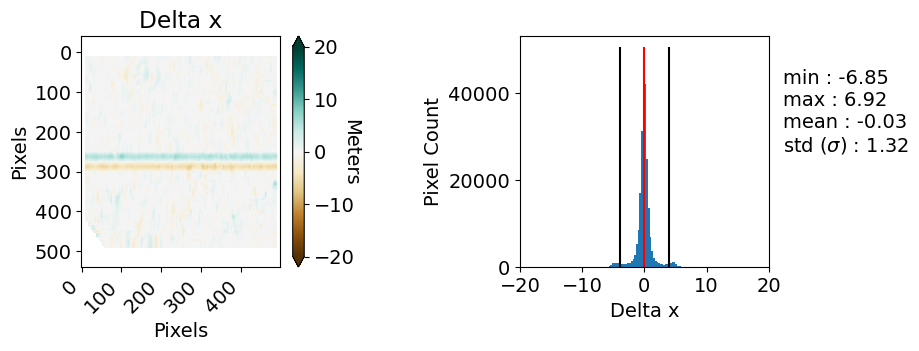

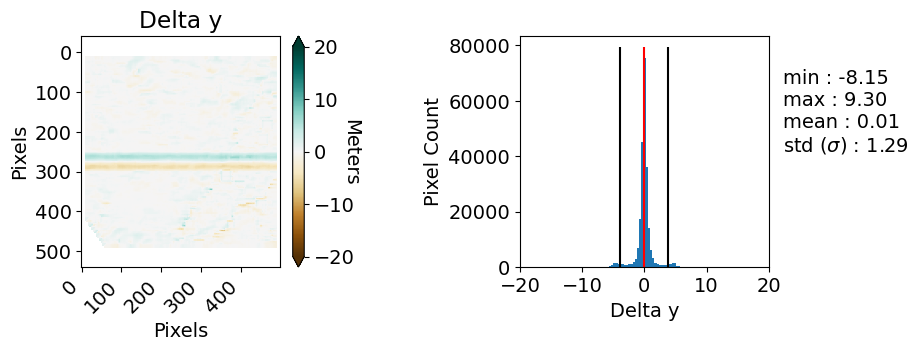

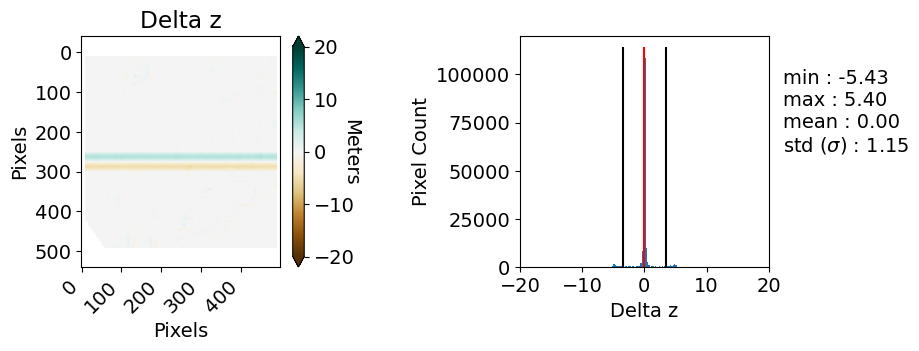

In [16]:
for c in ['x', 'y', 'z']:
    fig = plt.figure()
    filepath = "output/self_test1_compare_delta_{}_500by500.raw".format(c)
    width = 500
    height = 500
    
    I = visualize_corr.readBinaryImage(filepath, width, height)
    mask = np.isnan(I)

    ax = plt.subplot(1,9,(1,3))
    visualize_corr.visualize_corr(I+X, "image_jitter_compare_{}".format(c), "Delta {}".format(c), mask, fig=fig, ax=ax, limits=[-20,20])

    ax1= plt.subplot(1,9,(6,8))
    ax2= plt.subplot(1,9,9)
    visualize_corr.corr_histogram(I+X, "image_jitter_compare_{}".format(c), "Delta {}".format(c), mask, fig=fig, ax1=ax1, ax2=ax2, limits=[-20,20])